## TP 4
### Vision por computadora 1
#### Marcelo Chichiri

▪ Para las imágenes suministradas:
1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas

#### Obtención y presentación de las imagenes de prueba

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [2]:
# Lee el archivo y devuelve la imagen en formato original BGR, color RGB y escala de grices
def obtener_imagen(Archivo=''):
    # Carga imagen y convierte a RGB
    img_original = cv.imread(Archivo, cv.IMREAD_COLOR)
    img_color= cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    
    # Convierte imagen a escala de grices 
    img_BN= cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
    
    return img_original, img_color, img_BN #, img_bordes

In [3]:
# Crea una lista con los nombres de las imagenes a usar
imagenes =  ['Imagen1.png', 'Imagen2.png', 'Imagen3.png', 
             'Imagen4.png', 'Imagen5.png']

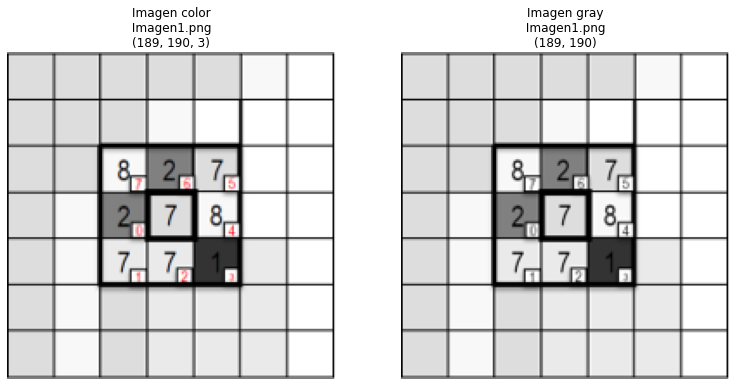

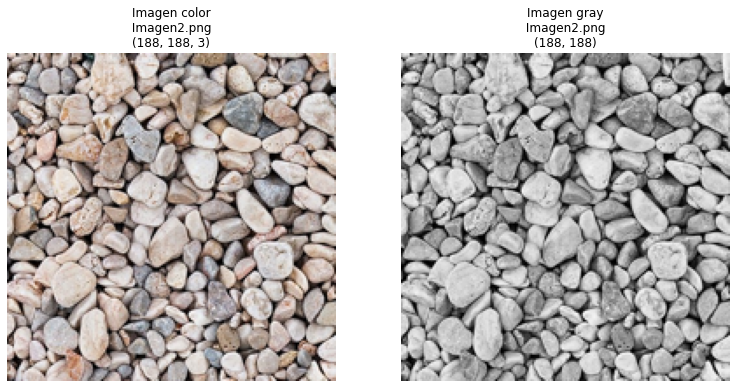

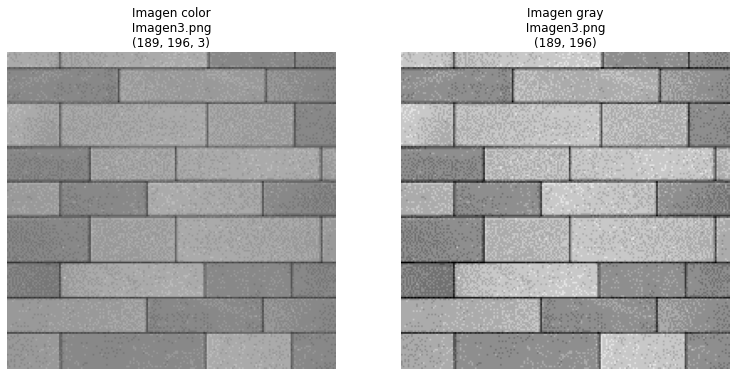

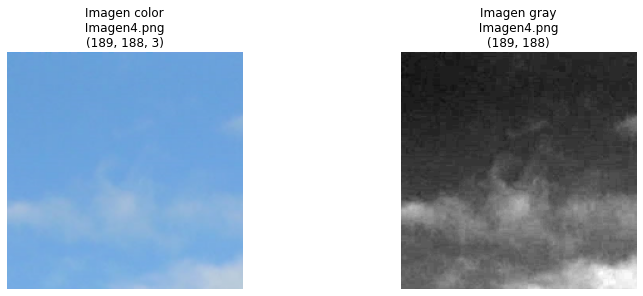

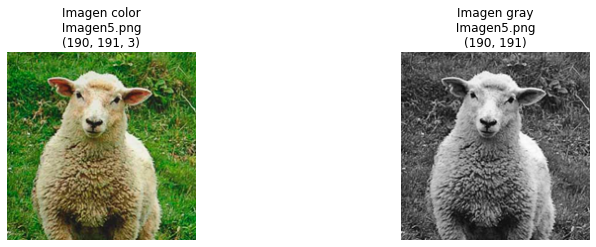

In [4]:
# grafica las imagenes de prueba
fila = 0
for imagen in imagenes:
    fila = fila+1
    img_original, img_Color, img_BN = obtener_imagen(Archivo=imagen)
    plt.figure(figsize=(20, 20))
    plt.subplot(fila,3,1)
    plt.axis('off')
    plt.title(f'Imagen color\n {imagen} \n{np.shape(img_Color)}')
    plt.imshow(img_Color, cmap='gray')
    
    # Muestra imagen en escala de grices 
    plt.subplot(fila,3,2)
    plt.axis('off')
    plt.title(f'Imagen gray\n {imagen} \n{np.shape(img_BN)}')
    plt.imshow(img_BN, cmap='gray')


#### 1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
Calculo de descriptor LBP (Local Binary Pattern), basado en textura

In [5]:
# Calcula el descriptor LBP (Local Binary Pattern)
# Se ingresa con la imagen y devuelve la imagen del descriptor LBP

def LBP(archivo_img=''):
    
    (H, W) = archivo_img.shape
    img_LBP = np.zeros((H-2, W-2),dtype=np.uint8)
    
    for idxH in range(1, H-1):
        for idxW in range(1, W-1):
            pixel = archivo_img[idxH][idxW]
            nuevo_valor = (archivo_img[idxH-1][idxW-1]>=pixel)*(128) # 2**7
            nuevo_valor = nuevo_valor + (archivo_img[idxH-1][idxW]>=pixel)*(64) # 2**6
            nuevo_valor = nuevo_valor + (archivo_img[idxH-1][idxW+1]>=pixel)*(32) # 2**5
            nuevo_valor = nuevo_valor + (archivo_img[idxH][idxW+1]>=pixel)*(16)  # 2**4
            nuevo_valor = nuevo_valor + (archivo_img[idxH+1][idxW+1]>=pixel)*(8) # 2**3
            nuevo_valor = nuevo_valor + (archivo_img[idxH+1][idxW]>=pixel)*(4)  # 2**2
            nuevo_valor = nuevo_valor + (archivo_img[idxH+1][idxW-1]>=pixel)*(2) # 2**1
            nuevo_valor = nuevo_valor + (archivo_img[idxH][idxW-1]>=pixel) # 2**0
            img_LBP[idxH-1][idxW-1] = nuevo_valor
            
    return img_LBP

#### 2. Realizar el histograma de características LBP de la imagen y comparar los histogramas

In [6]:
# Muestra la imagen en color, escala de grices y LBP

def mostrar_imagen(archivo_img=''):

    # Obtiene el archivo 
    img_original, img_Color, img_BN = obtener_imagen(Archivo=archivo_img)
    
    # Calcula el descriptor LBP
    img_LBP = LBP(img_BN)

    # Cálculo del histograma de la imagen en B&N
    histograma_img_BN ,bins_img_BN = np.histogram(img_BN.ravel(),256,[0,255])
    
    # Cálculo del histograma de la imagen color  
    histograma_img_color ,bins_img_color = np.histogram(img_Color.ravel(),256,[0,255])

    # Cálculo del histograma de la imagen convertida con LBP
    histograma_LBP ,bins_LBP = np.histogram(img_LBP.ravel(),256,[0,255])
    
    # Muestra imagen color     
    plt.figure(figsize=(15, 15))
    plt.subplot(2,3,1)
    #plt.axis('off')
    plt.title(f'Imagen original color \n {archivo_img} \n{np.shape(img_Color)}')
    plt.imshow(img_Color)

    # Muestra imagen en escala de grices 
    plt.subplot(2,3,2)
    #plt.axis('off')
    plt.title(f'Imagen original B&N\n {archivo_img} \n{np.shape(img_BN)}')
    plt.imshow(img_BN, cmap='gray')
    
    # Muestra imagen LBP 
    plt.subplot(2,3,3)
    #plt.axis('off')
    plt.title(f'Imagen LBP\n {archivo_img} \n{np.shape(img_LBP)}')
    plt.imshow(img_LBP, cmap='gray')
    
    # Muestra el histograma de la imagen color   
    plt.subplot(2,3,4)
    #plt.axis('off')
    plt.title(f'histograma Color\n {archivo_img} \n{len(bins_img_BN)} bins')
    plt.plot(histograma_img_color)

    # Muestra el histograma de la imagen en escala de grices   
    plt.subplot(2,3,5)
    #plt.axis('off')
    plt.title(f'histograma B&N\n {archivo_img} \n{len(bins_img_BN)} bins')
    plt.plot(histograma_img_BN)

    # Muestra el histograma de la imagen LBP   
    plt.subplot(2,3,6)
    #plt.axis('off')
    plt.title(f'histograma LBP\n {archivo_img} \n{len(bins_img_BN)} bins')
    plt.plot(histograma_LBP)


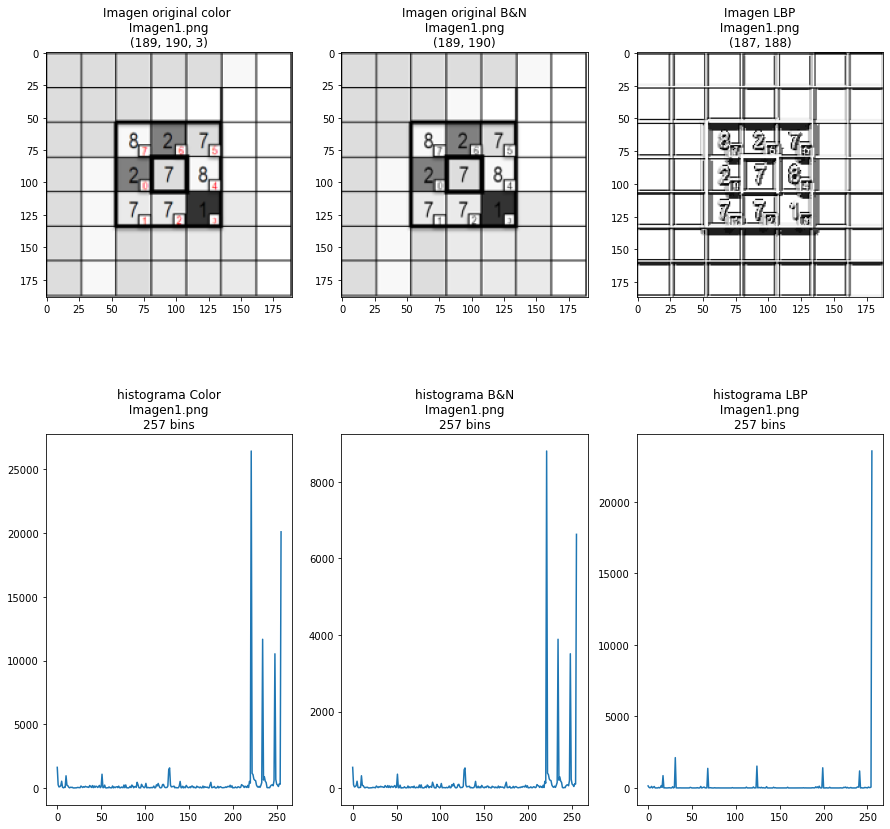

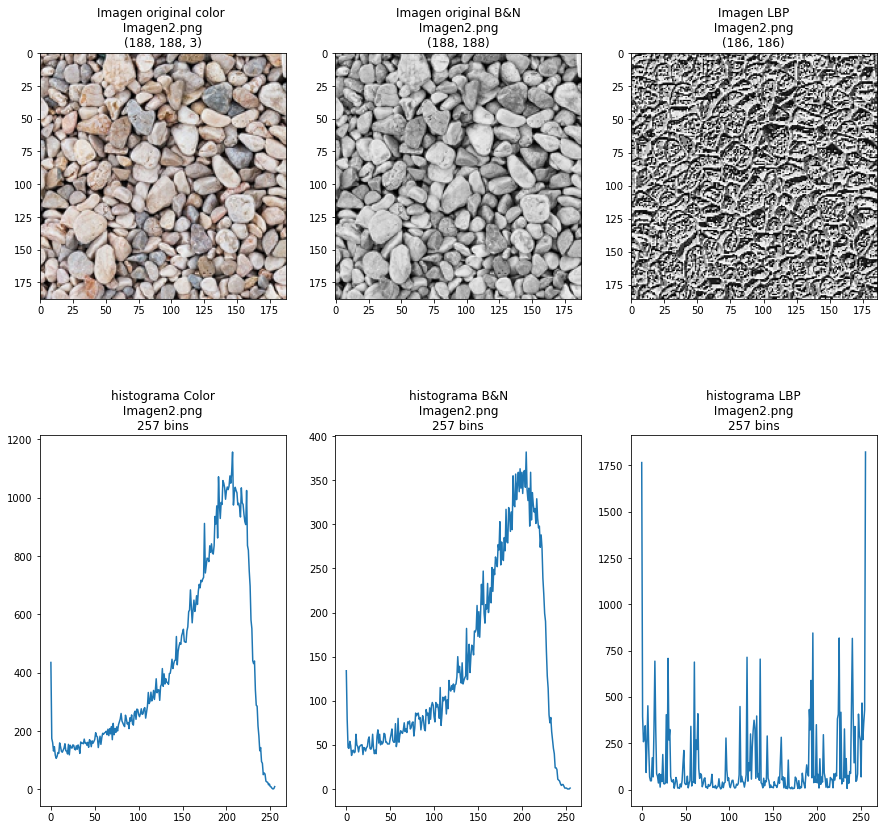

In [7]:
# grafica parte de las imagenes de prueba

imagenes =  ['Imagen1.png', 'Imagen2.png']

for imagen in imagenes:
    mostrar_imagen(imagen)

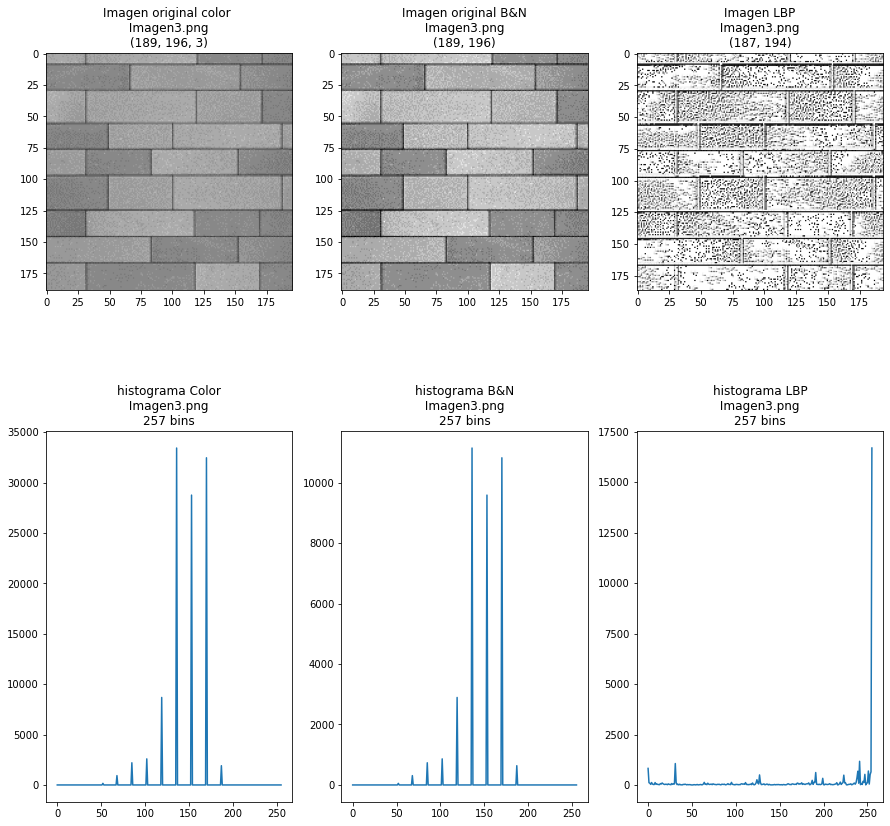

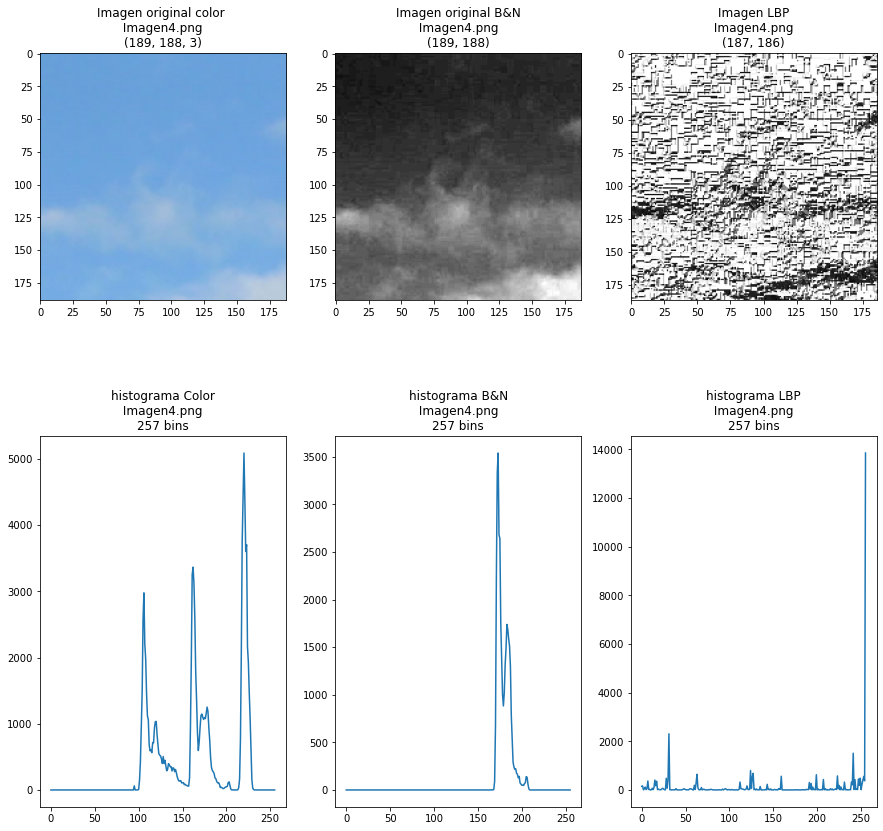

In [8]:
# grafica parte de las imagenes de prueba

imagenes =  ['Imagen3.png', 'Imagen4.png']

for imagen in imagenes:
    mostrar_imagen(imagen)

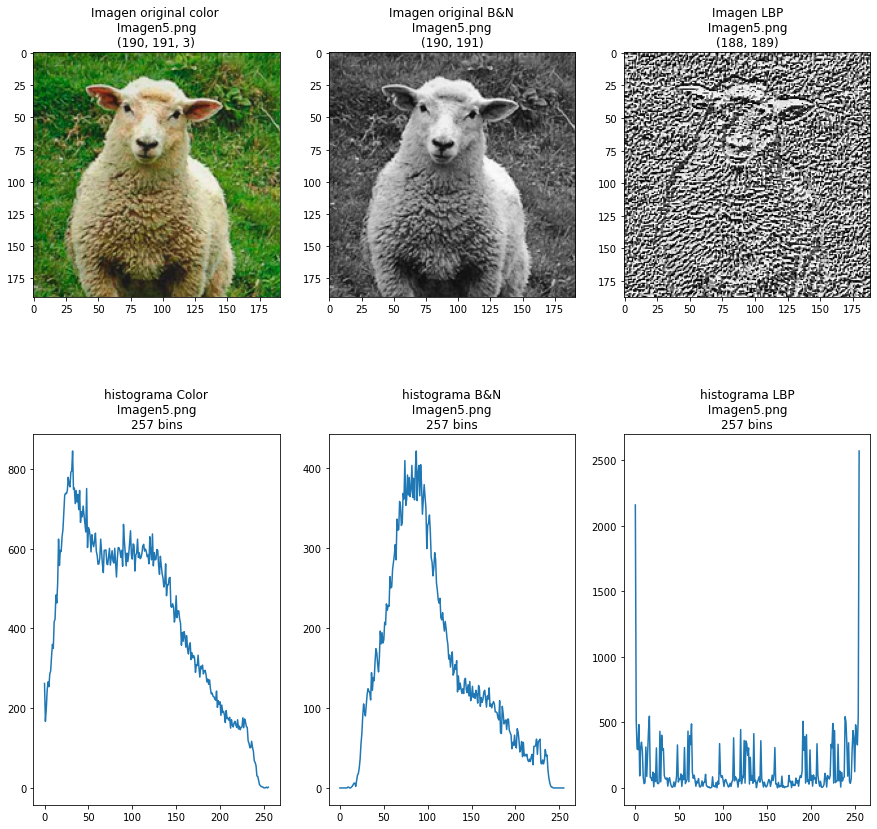

In [9]:
# grafica parte de las imagenes de prueba
path_imagenes = './images'
imagenes =  ['Imagen5.png']

for imagen in imagenes:
    mostrar_imagen(imagen)

#### Resultados y conclusiones

En la comparación de los histogramas se ve que, mientras que en la imagen original los niveles de brillo están mas concentrados en algunos o en un grupo de bins, en la imagen del descriptor LBP están mucho mas distribuidos en todos los bins, mostrando un aumento significativo en los bins de mayor valor. 